In [3]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import sqlite3

In [113]:
def calendar_array(dates, data):
    i, j = zip(*[d.isocalendar()[1:] for d in dates])
    i = np.array(i) - min(i)
    j = np.array(j) - 1
    ni = max(i) + 1
 
    calendar = np.nan * np.zeros((ni, 7))
    calendar[i, j] = data
    return i, j, calendar
 
 
def calendar_heatmap(ax, dates, data):
    i, j, calendar = calendar_array(dates, data)
    im = ax.imshow(calendar, interpolation='none', cmap='Reds')
    label_days(ax, dates, i, j, calendar)
    ax.set_yticklabels([])
    ax.set(yticks=[])
 
 
def label_days(ax, dates, i, j, calendar):
    ni, nj = calendar.shape
    day_of_month = np.nan * np.zeros((ni, 7))
    day_of_month[i, j] = [d.day for d in dates]
 
    for (i, j), day in np.ndenumerate(day_of_month):
        if np.isfinite(day):
            ax.text(j, i, int(day), ha='center', va='center', fontsize=30)
 
    ax.set(xticks=np.arange(7),
           xticklabels=['M', 'T', 'W', 'R', 'F', 'S', 'S'])
    ax.tick_params(axis = 'both', which = 'major', labelsize = 30)    
    ax.xaxis.tick_top()
 
 
# def label_months(ax, dates, i, j, calendar):
#     month_labels = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
#                              'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
#     months = np.array([d.month for d in dates])
#     uniq_months = sorted(set(months))
#     yticks = [i[months == m].mean() for m in uniq_months]
#     labels = [month_labels[m - 1] for m in uniq_months]
#     ax.set(yticks=yticks)

In [75]:
conn = sqlite3.connect('dpc.db')
df = pd.read_sql('SELECT * FROM count_tweets_daily', conn)
conn.close()
df.head()

,date,count
0,20140101,1
1,20140102,0
2,20140103,0
3,20140104,0
4,20140105,1


In [76]:
def parse_date(year, month):
    if month >= 10:
        return str(year)+str(month)+'01', str(year)+str(month)+'31'
    else:
        return str(year)+'0'+str(month)+'01', str(year)+'0'+str(month)+'31'

In [77]:
def get_ax_position(month):
    x = (month - 1) // 4
    y = (month - 1) % 4
    return x, y

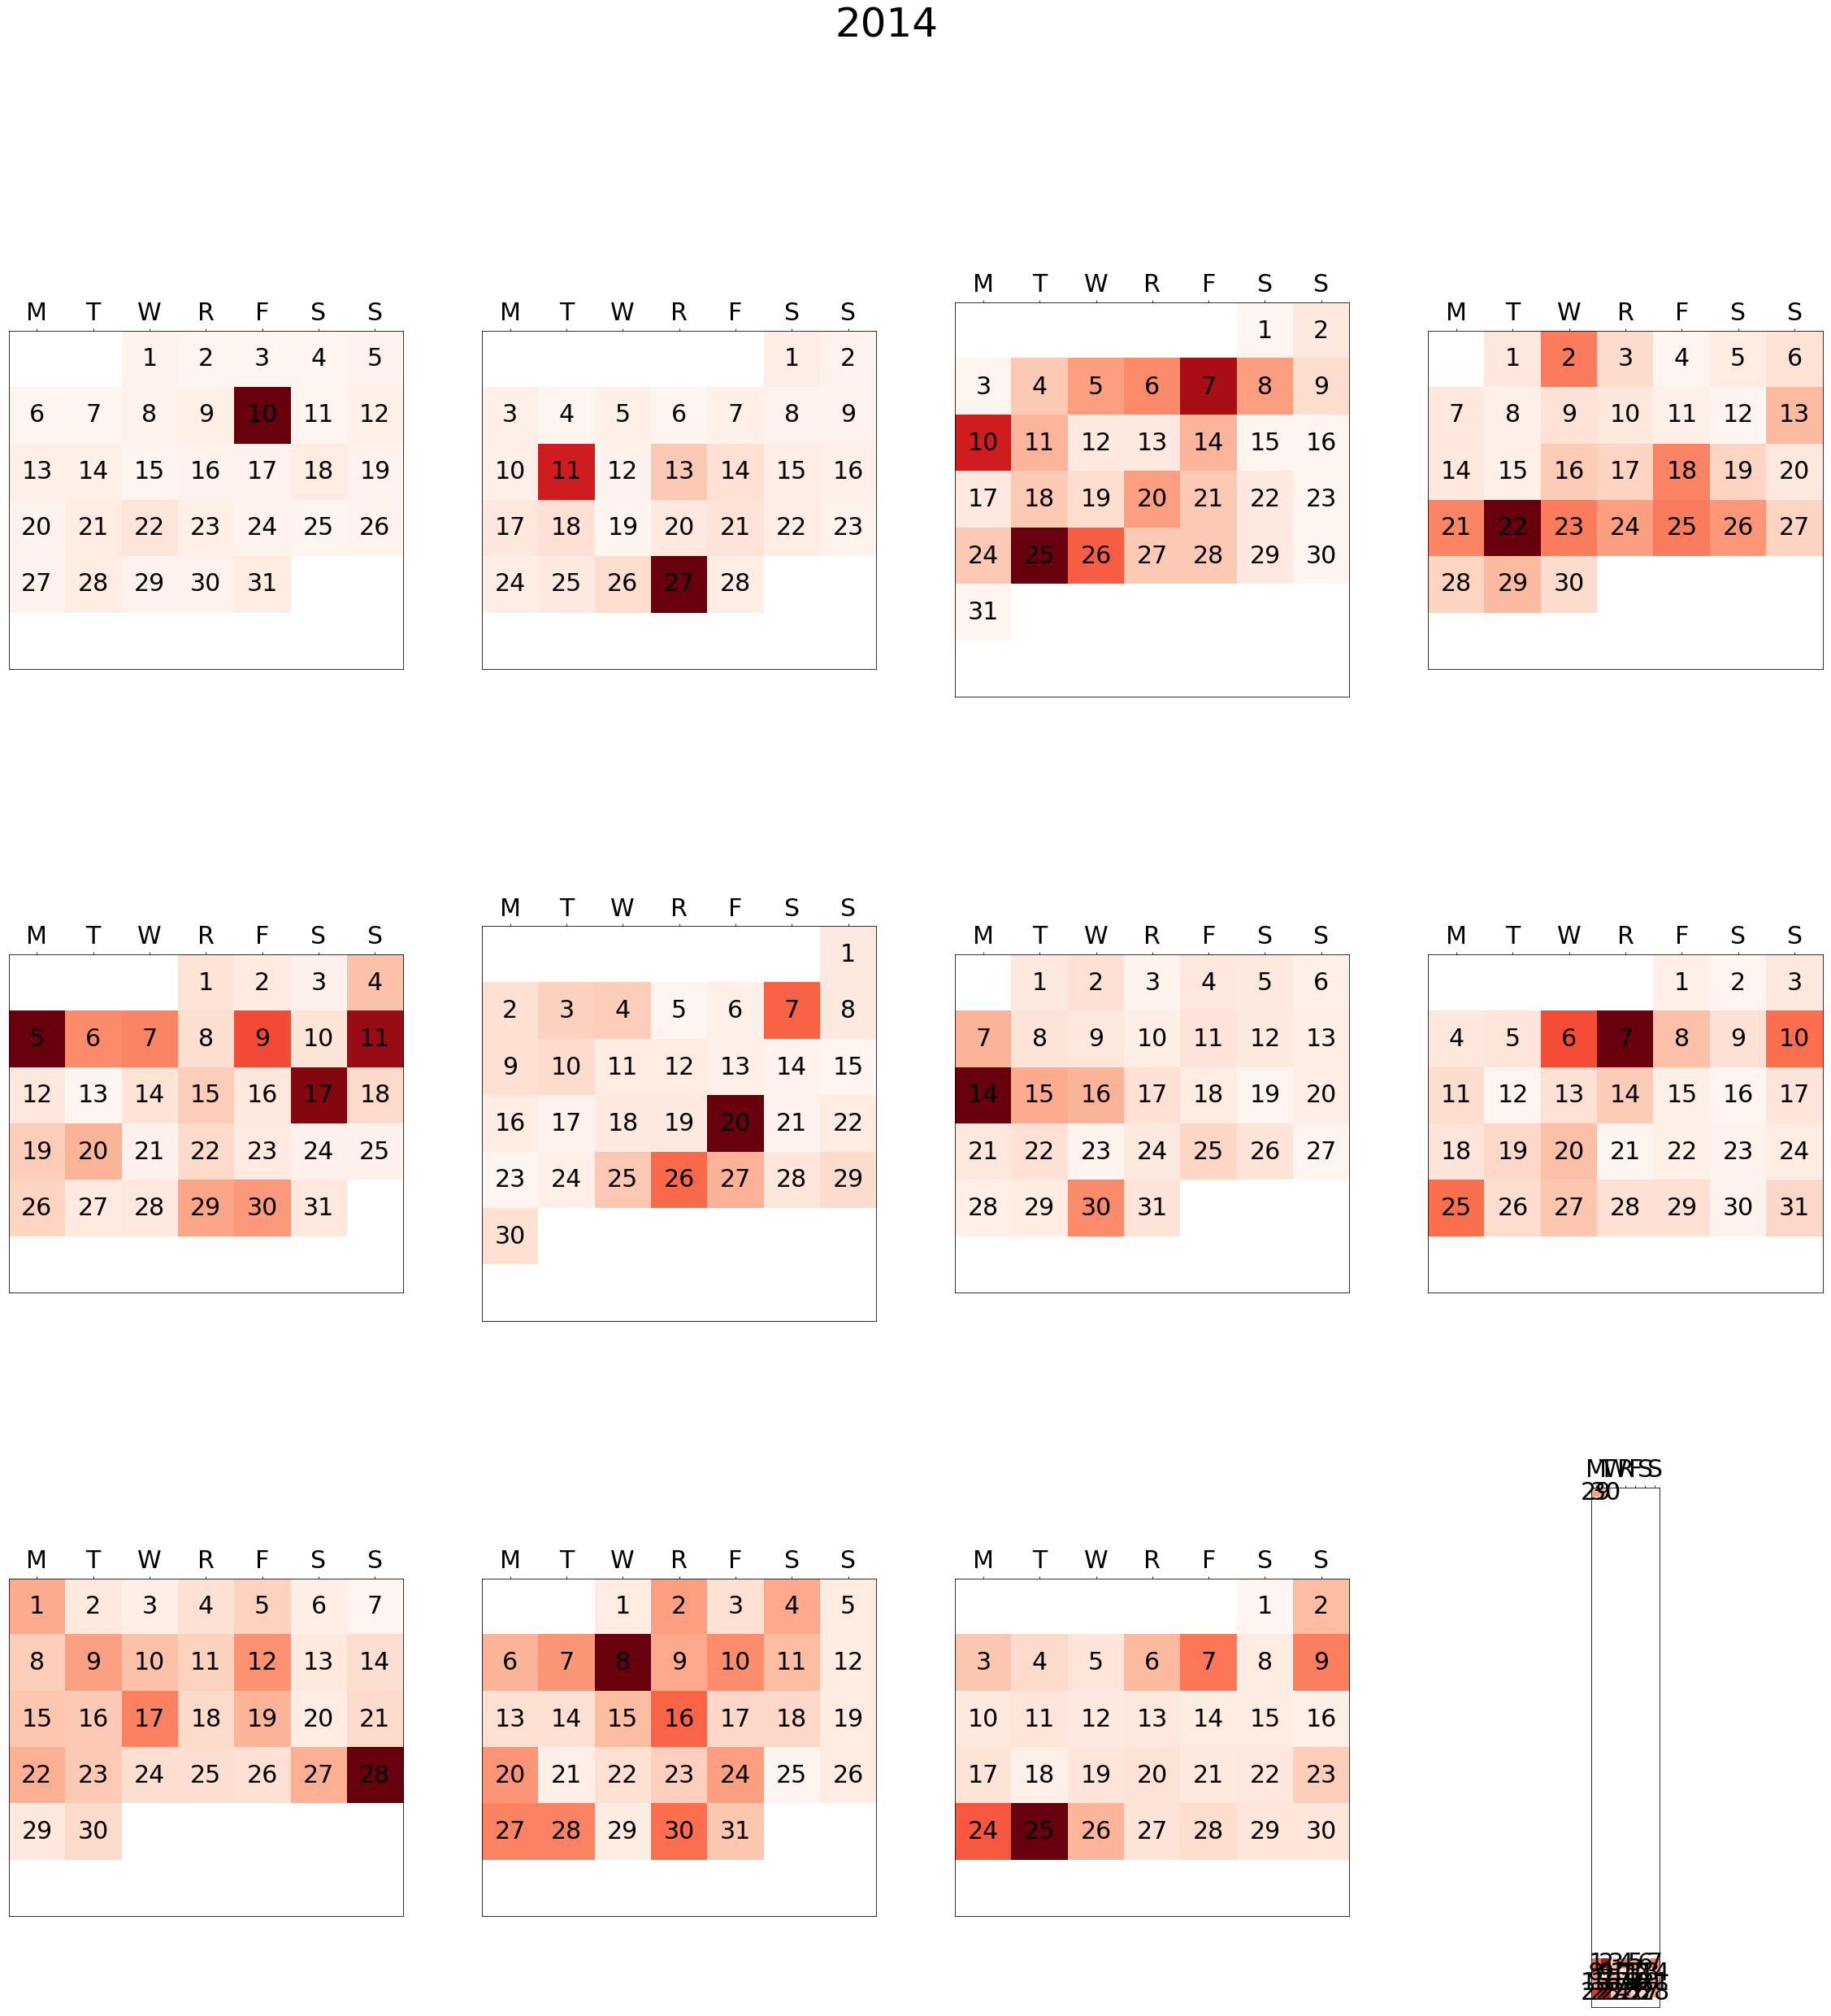

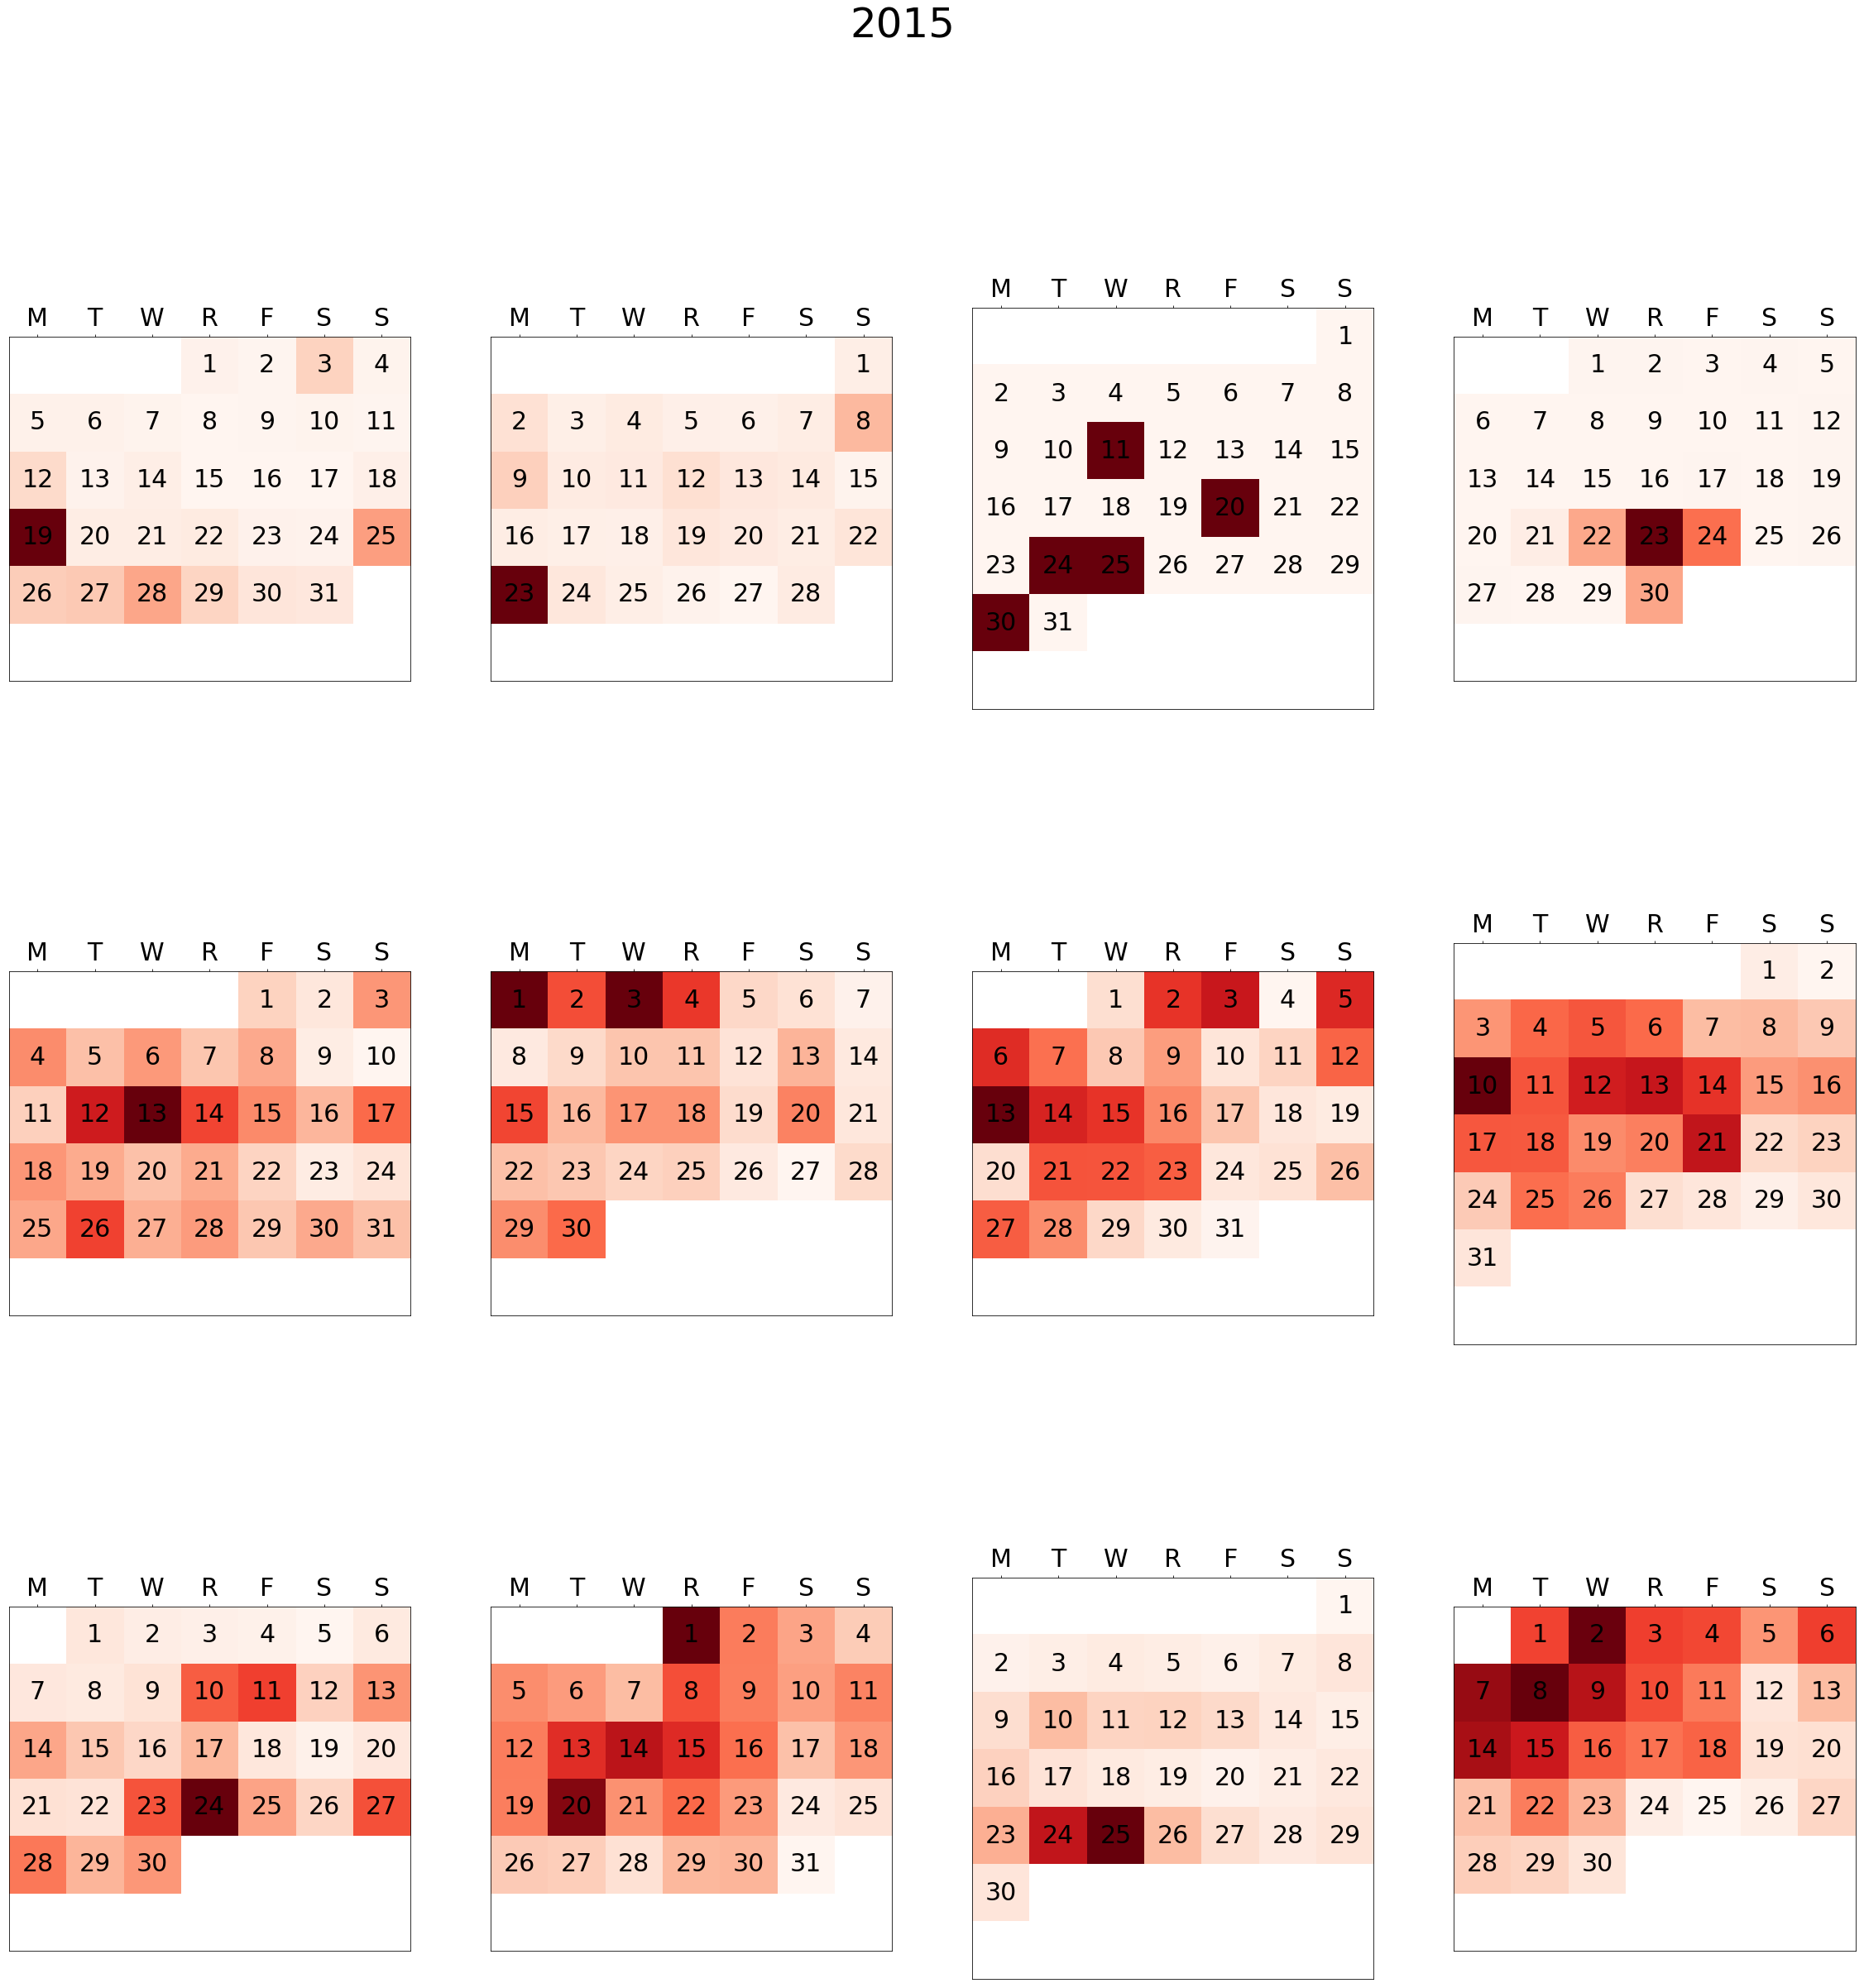

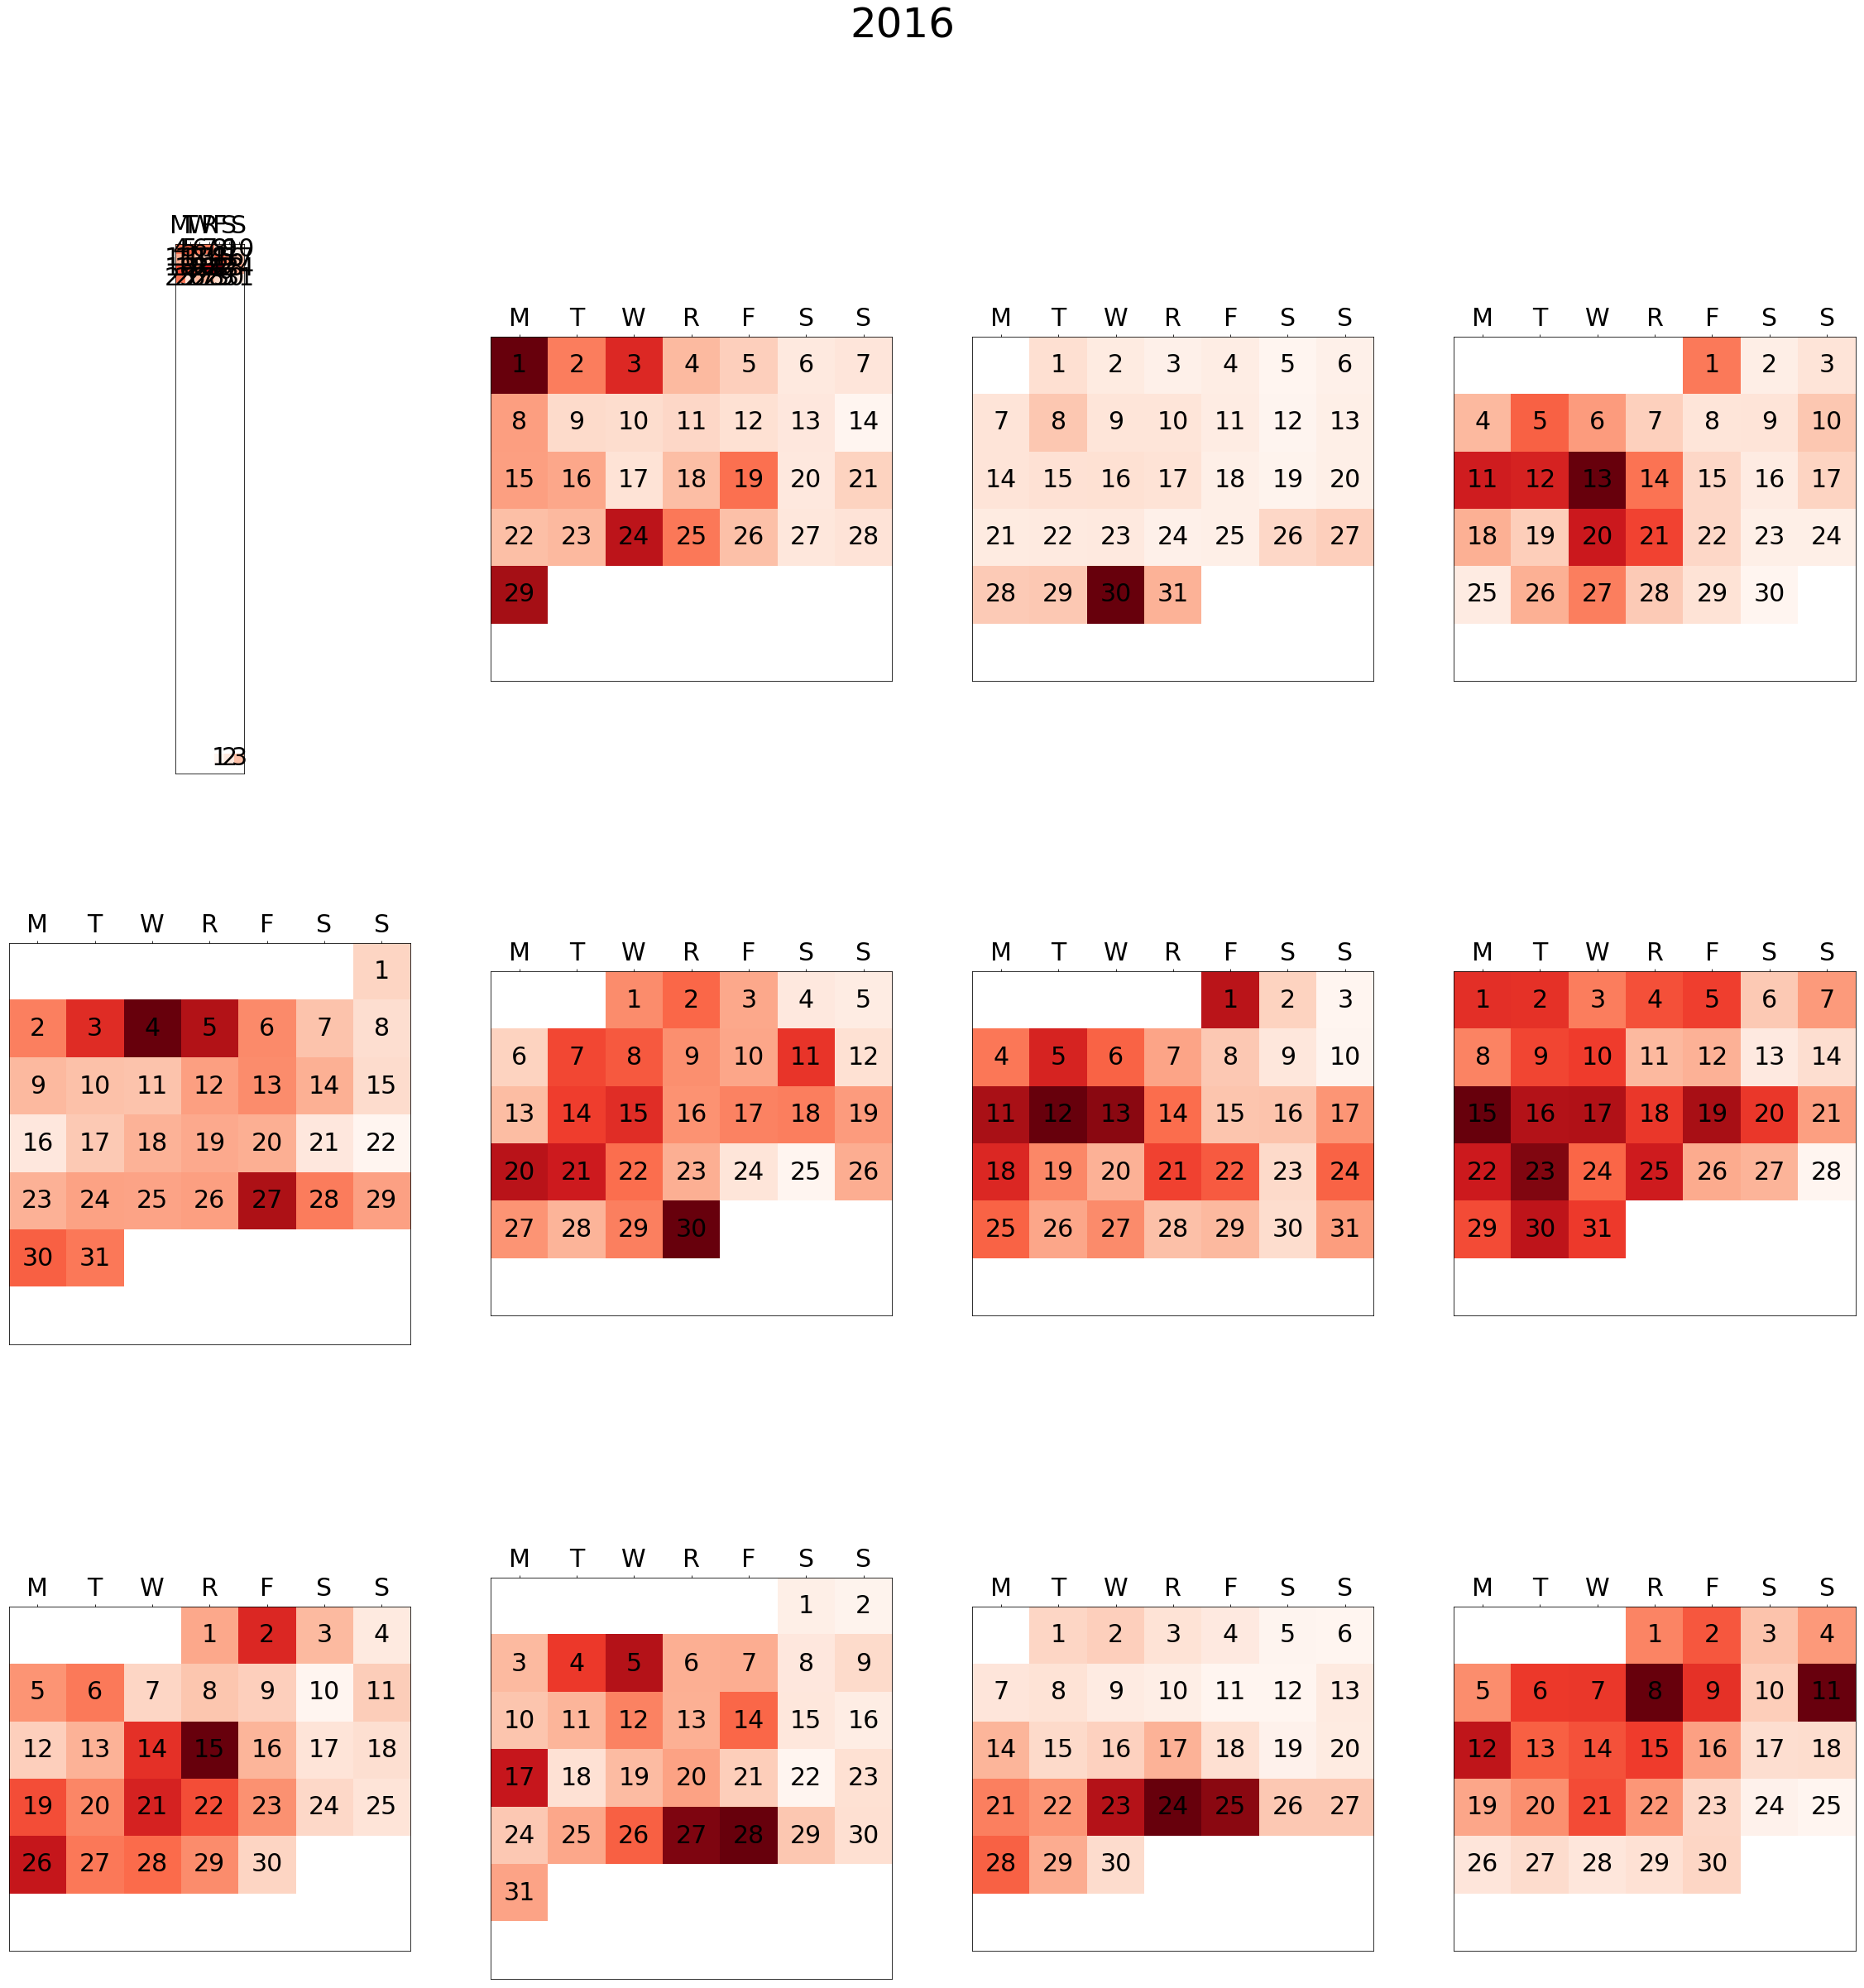

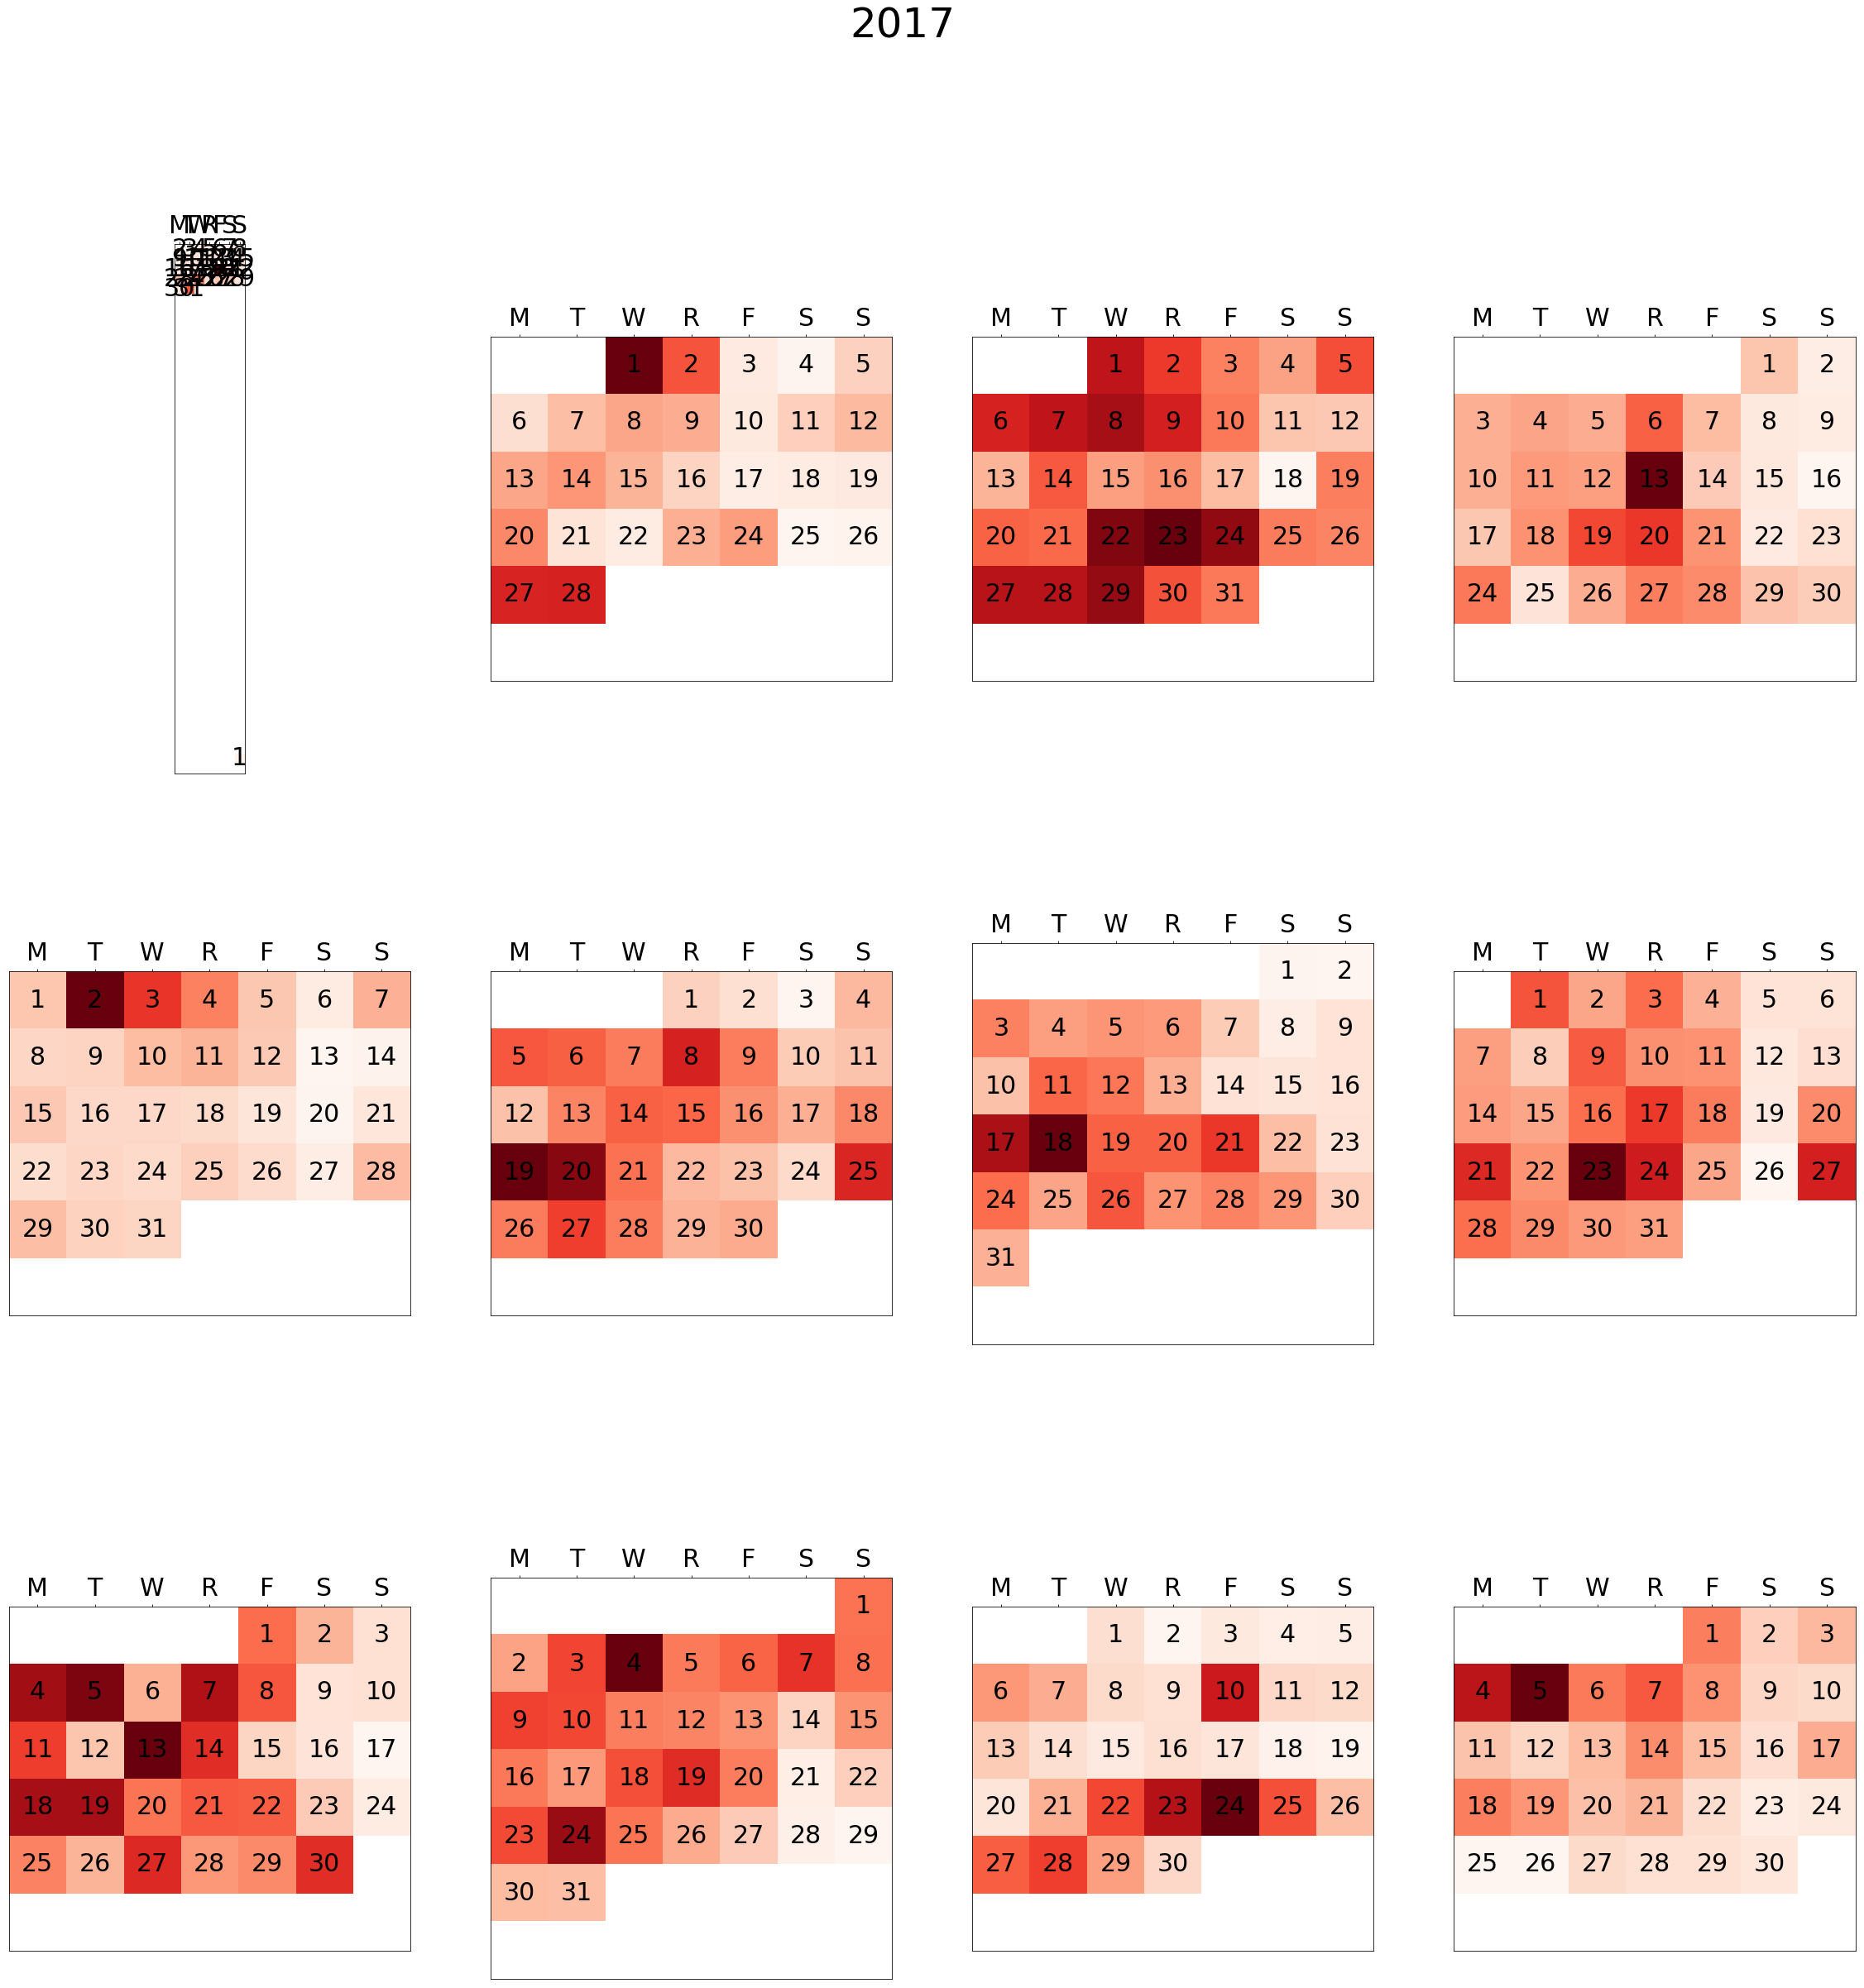

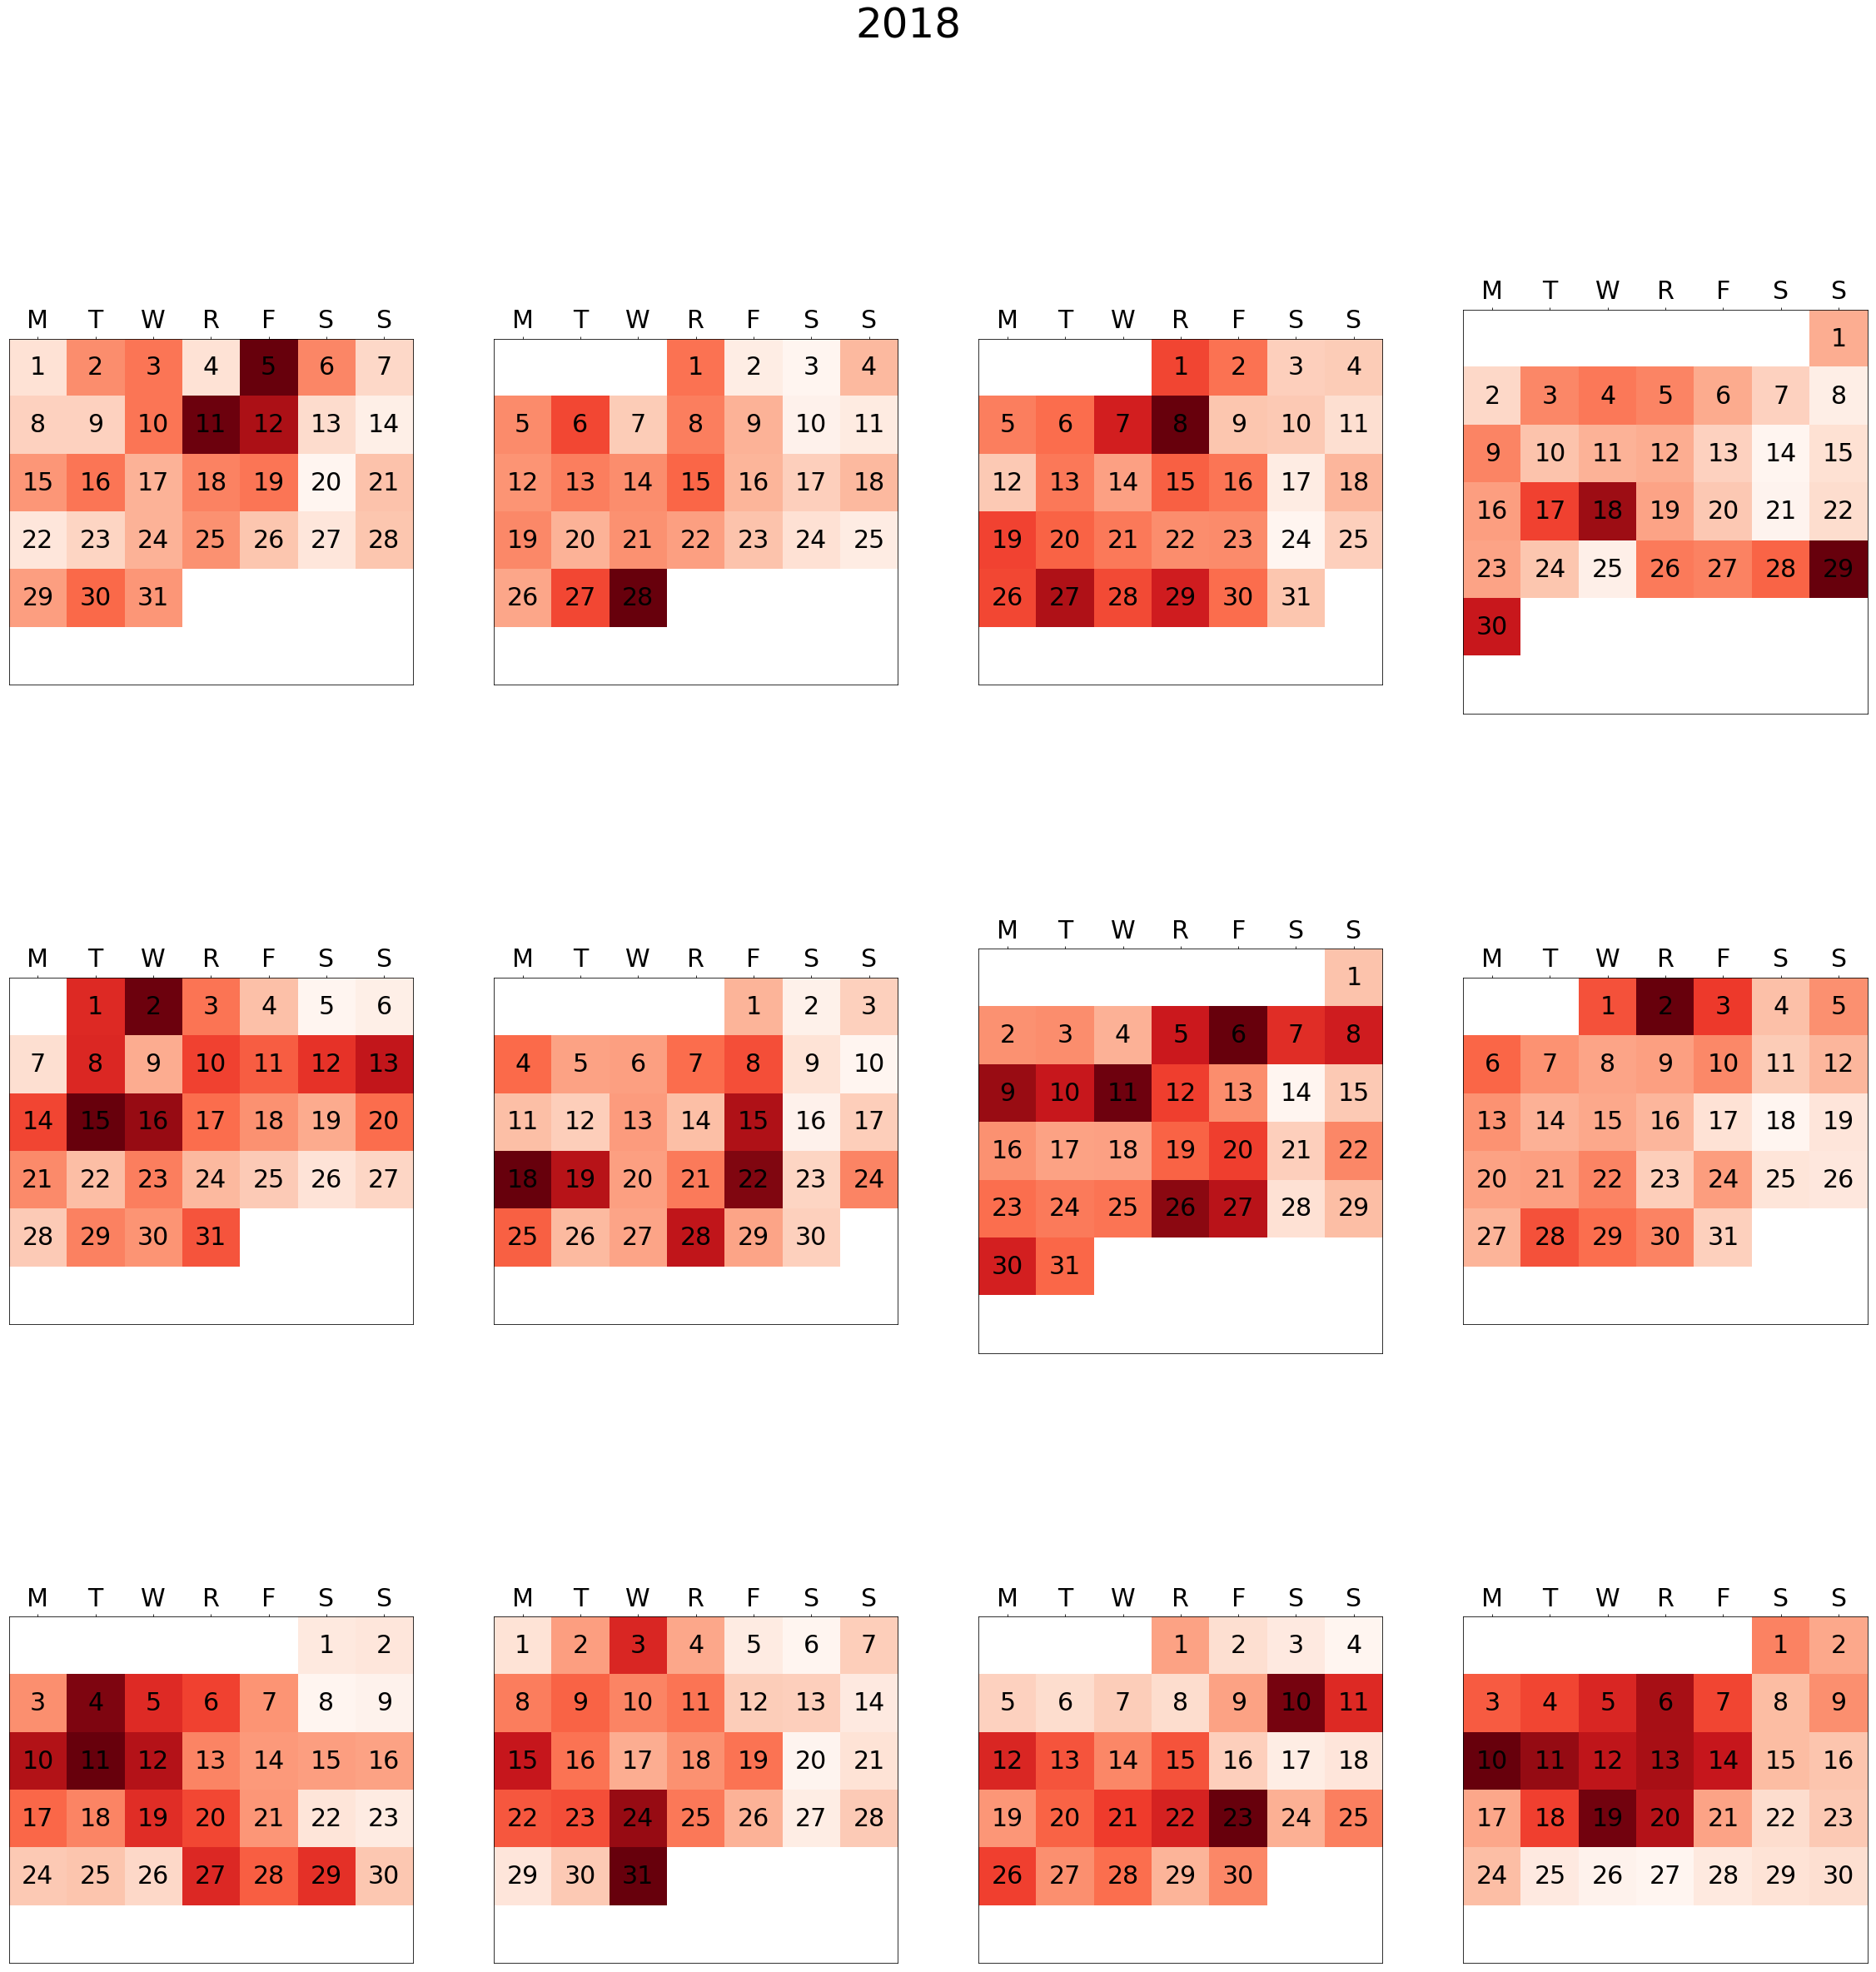

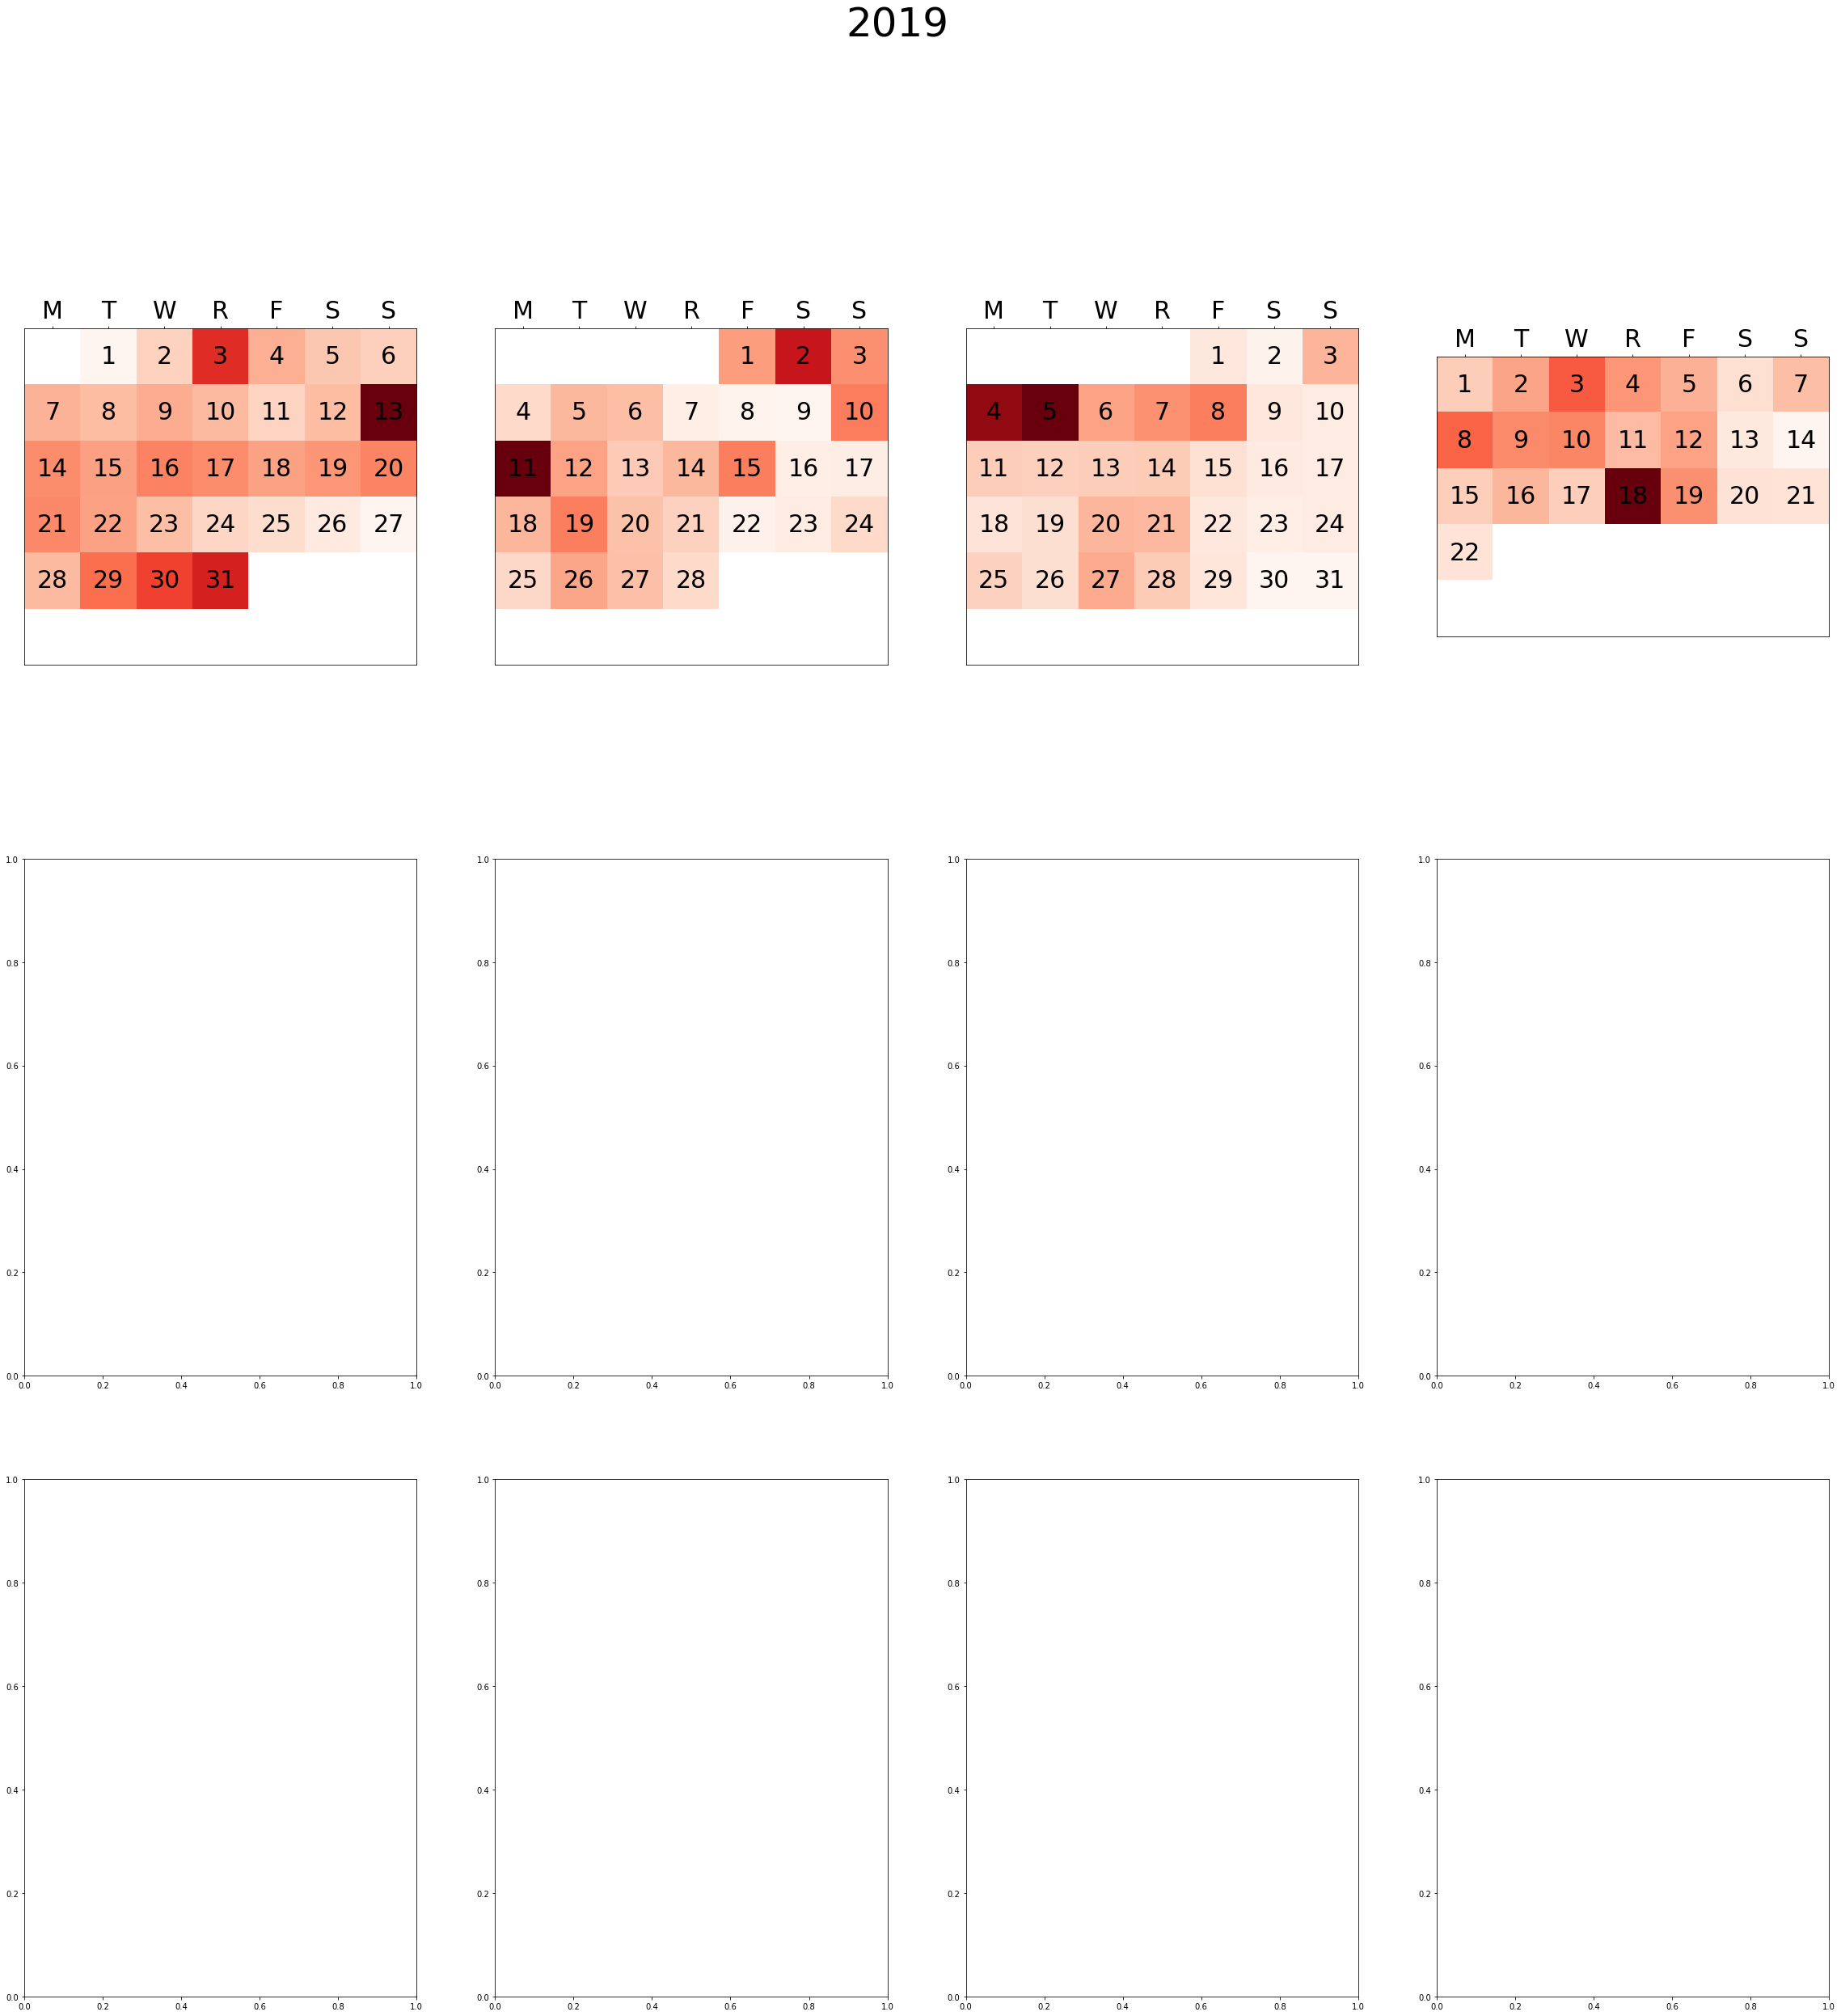

In [114]:
for year in range(2014,2020):
    
    fig, axarr = plt.subplots(nrows=3, ncols=4, figsize=(40, 40))
    fig.suptitle(str(year), fontsize=50)
    
    for month in range(1, 13):
        
        if year == 2019 and month == 5:
            break
        
        from_date, end_date = parse_date(year, month)
        df_filt = df[(df.date >= from_date) & (df.date <= end_date)]

        dates = []
        for date in df_filt.date:
            dates.append(dt.datetime.strptime(date, '%Y%m%d'))

        data = df_filt['count']

        x, y = get_ax_position(month)
        
        calendar_heatmap(axarr[x, y], dates, data)
        
    plt.savefig('output/'+str(year)+'.png')
